In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cleaned_hm = "happydb/data/cleaned_hm.csv"
demographic_data = "happydb/data/demographic.csv"

In [136]:
cleaned_dataset = pd.read_csv(cleaned_hm)
worker_data = pd.read_csv(demographic_data)
dataset = pd.merge(cleaned_dataset, worker_data, on='wid', how='inner')

In [148]:
categories = dataset.predicted_category.unique()

In [138]:
def convert_to_int(val):
    v = str(val).split('.')[0]
    if len(v) > 2:
        return None
    return v

dataset['age'] = dataset['age'].apply(convert_to_int)


In [139]:
df2 = dataset[['age', 'predicted_category','wid']].groupby(['age', 'predicted_category'], as_index=False).agg('count')

In [140]:
df3 = df2.groupby(['age'], as_index=False)['wid'].max()

In [141]:
df3.count()

age    73
wid    73
dtype: int64

In [142]:
df4 = pd.merge(df2, df3, on=['age','wid'], how='inner')
df4

,age,predicted_category,wid
0,17,achievement,3
1,18,achievement,210
2,19,achievement,428
3,2,affection,7
4,20,achievement,540
5,21,achievement,975
6,22,achievement,1175
7,23,achievement,1618
8,24,achievement,1618
9,25,achievement,2066


In [143]:
ageList = df4['age'].tolist()
category_list = df4['predicted_category'].tolist()

In [151]:
d = {v:k+2 for k,v in enumerate(categories)}
d

{'achievement': 5,
 'affection': 2,
 'bonding': 4,
 'enjoy_the_moment': 6,
 'exercise': 7,
 'leisure': 3,
 'nature': 8}

In [153]:
categoryList = [d[cat] for cat in category_list]

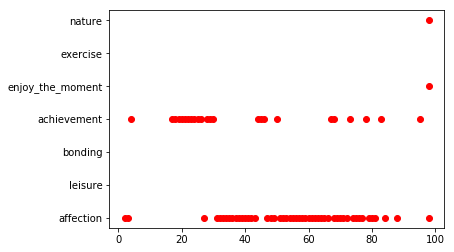

In [160]:
plt.yticks(d.values(), d.keys())
plt.plot(ageList, categoryList, 'ro')
plt.show()